<a href="https://colab.research.google.com/github/ZofiaLandowska/notes/blob/main/project2_landowska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Zofia Landowska 

Proposed Points (out of 25): 20

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I trained a Neural Network on "Netflix Stock Price Prediction" dataset which 
I downloaded from Kaggle. The goal of my model is to predict the price at which the stock will close. The dataset I used contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022. It includes 7 columns: 

1. "Date" 
2. "Open" - price at which stock opened 
3. "High" - today's high 
4. "Low" - today's low
5. "Close" - close price adjusted for splits
6. "Adj Close" - adjusted close price adjusted for splits and dividend and/or capital gain distributions
7. "Volume" - volume of stocks

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

First I dropped the "Adj Close" column since I will not be using it in my predictions. Then, I added a new column that contains the day of the week for each date in the "Date" column. This can be useful for analyzing trends or patterns that may be specific to certain days of the week. I also checked for any missing values and there were none. Finally, I split the dataset into input features and target variable.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load and prepare your data here
import pandas as pd

path = '/content/drive/MyDrive/NFLX.csv'
data = pd.read_csv(path)
df = pd.read_csv(path, parse_dates=['Date'])

df.drop(['Adj Close'], axis=1, inplace=True)

for i, row in df.iterrows():
    dt = row['Date']
    df.at[i, 'Day of the week'] = dt.weekday()

df.drop(['Date'], axis=1, inplace=True)

print(data.isnull().sum())

x = df.drop('Close', axis=1)
y = df['Close']

df.head()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Open,High,Low,Close,Volume,Day of the week
0,262.000000,267.899994,250.029999,254.259995,11896100,0.0
1,247.699997,266.700012,245.000000,265.720001,12595800,1.0
2,266.579987,272.450012,264.329987,264.559998,8981500,2.0
3,267.079987,267.619995,250.000000,250.100006,9306700,3.0
4,253.850006,255.800003,236.110001,249.470001,16906900,4.0


# 3. Research

Put your code and your experiments here.

In [ ]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                384       
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x, y, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
26/26 [==============================] - 1s 9ms/step - loss: 587564.1250 - mae: 587564.1250 - val_loss: 88134.0469 - val_mae: 88134.0469
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 66670.1328 - mae: 66670.1328 - val_loss: 27539.9531 - val_mae: 27539.9531
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 11532.0459 - mae: 11532.0459 - val_loss: 7972.5576 - val_mae: 7972.5576
Epoch 4/50
26/26 [==============================] - 0s 5ms/step - loss: 6551.0327 - mae: 6551.0327 - val_loss: 4630.6187 - val_mae: 4630.6187
Epoch 5/50
26/26 [==============================] - 0s 5ms/step - loss: 6849.8555 - mae: 6849.8555 - val_loss: 6880.4546 - val_mae: 6880.4546
Epoch 6/50
26/26 [==============================] - 0s 6ms/step - loss: 11155.3008 - mae: 11155.3008 - val_loss: 9066.6572 - val_mae: 9066.6572
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 6284.3501 - mae: 6284.3501 - val_loss: 2058.7695 - val_mae: 20

[]

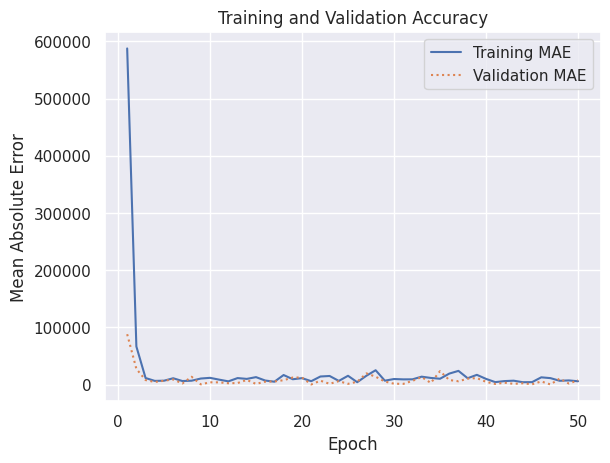

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [ ]:
from sklearn.metrics import r2_score

r2_score(y, model.predict(x)) 

32/32 [==============================] - 0s 1ms/step


-21684.22233530261

In [ ]:
import numpy as np

#price at which stock opened, today's high, today's low, volume, day of the week
model.predict(np.array([[255, 267, 244, 11896100, 3]]))

1/1 [==============================] - 0s 46ms/step


array([[20664.781]], dtype=float32)

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

Considering the R2 value, the model performed poorly. This might be due to an issue with the input data, the model architecture, or the parameters used to train the model. 

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

The most challenging part of this project was model selection. It was difficult to determine which model would perform best. To overcome this challenge, I used Day 20 notes which deal with a similar problem. 